# Introducing E<sub>min</sub>
E<sub>min</sub> measures the difference in energy between a molecule and its lowest-energy constitutional isomer. 
We hypothesize that synthesizable molecules must have E<sub>min</sub> below a certain threshold to be synthesizable
and test that hypothesis using data from QM9.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import numpy as np

## Load QM9 Data
We've already labelled the data in QM9 as in PubChem or not.

In [2]:
qm9 = pd.read_json('data/qm9.json.gz', lines=True)
print(f'Loaded {len(qm9)} molecules')

Loaded 126405 molecules


## Plot Histograms
A first way to assess the quality of Emin is to see the distribution of energies. 
We expect to see synthesized molecules have low energies

In [3]:
qm9['g4mp2_above_min'] = qm9['g4mp2_energy'] - qm9.groupby('formula')['g4mp2_energy'].transform('min')

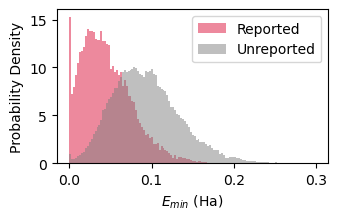

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

all_reported = qm9.query('in_pubchem')
all_unreported = qm9.query('not in_pubchem')

bins = np.linspace(0, 0.3, 128)
ax.hist(all_reported['g4mp2_above_min'], bins=bins, color='crimson', label='Reported',density=True,alpha=0.5)
ax.hist(all_unreported['g4mp2_above_min'], bins=bins, color='gray', label='Unreported',density=True,alpha=0.5)
ax.legend()

ax.set_xlabel(r'$E_{min}$ (Ha)')
ax.set_ylabel('Probability Density')
#plt.title(r'$E_{min}$ Distributions for QM9 Molecules') # remove title for manuscript
plt.savefig('figures/emin_dist.png', dpi=320)

We do seem to see most reported molecules have Emin below 100 mHa, and most unreported molecules have a peak above that.

## Assess Quality as Classifier
We can measure the quality of a classification metric by how well it divides positive and negative as a function of metric level using [an ROC Curve](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics).

In [5]:
fpr, tpr, thr = roc_curve(np.logical_not(qm9['in_pubchem']), qm9['g4mp2_above_min'])
auc = roc_auc_score(np.logical_not(qm9['in_pubchem']), qm9['g4mp2_above_min'])
print(f'We compute an AOC score of {auc:.3f}')

We compute an AOC score of 0.829


Text(0, 0.5, 'True Positive Rate')

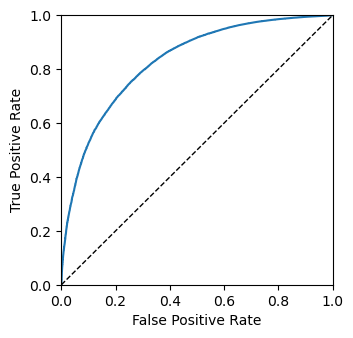

In [6]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))

ax.plot(fpr, tpr)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.plot([0, 1], [0, 1], 'k--', lw=1)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

The classifier performance is clearly better than random (the black, dashed line). We compare it to other work in our paper (in review)